# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_dataset = pd.read_csv("titanic_dataset.csv", index_col=0)
target = titanic_dataset['Survived']
titanic_dataset.drop("Survived", axis=1, inplace=True)
titanic_dataset['Survived'] = target
titanic_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
# split datasets
titanic_dataset = titanic_dataset.sample(frac=1, random_state=42)
titanic_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1


In [4]:
size = len(titanic_dataset)
train_data, test_data = titanic_dataset[:int(size*0.8)], titanic_dataset[int(size*0.8):]

print("Train data:", train_data.shape)
print("Test data:", test_data.shape)

Train data: (712, 11)
Test data: (179, 11)


In [5]:
# train_data.to_csv("train.csv")
# test_data.to_csv("test.csv")

## Exploring train dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 710 to 804
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       568 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     158 non-null    object 
 9   Embarked  710 non-null    object 
 10  Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [7]:
train_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       554
Embarked      2
Survived      0
dtype: int64

#### Relation between Gender and Survived

In [8]:
# Check the survival percentage
train_data['Survived'].value_counts() / len(train_data)

Survived
0    0.610955
1    0.389045
Name: count, dtype: float64

The survival is around 39% in this dataset

In [ ]:
# Check male and female survivals
survived_people = train_data[train_data['Survived'] == 1]
survived_victims = survived_people['Survived'].groupby(survived_people['Sex']).count() 

In [ ]:
survived_victims

Sex
female    187
male       90
Name: Survived, dtype: int64

This shows that around 66% females survived and 32% males survived from this incident.

In [ ]:
deceased_people = train_data[train_data['Survived'] == 0]
deceased_victims = deceased_people['Survived'].groupby(deceased_people['Sex']).count() 

In [ ]:
deceased_victims

Sex
female     66
male      369
Name: Survived, dtype: int64

Around 85% of males and 15% females died in this incident.

In [ ]:
deceased_victims.values

array([ 66, 369])

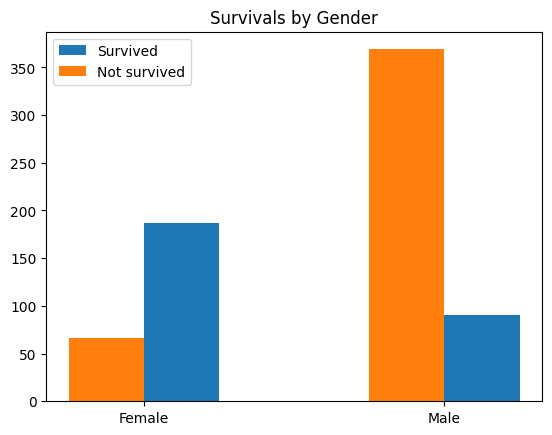

In [ ]:
plt.bar(x=["Female", "Male"], height=survived_victims, width=0.25, align='edge', label="Survived")
plt.bar(x=["Female", "Male"], height=deceased_victims, width=-0.25, align='edge', label="Not survived")

plt.title("Survivals by Gender")
plt.legend()
plt.show()

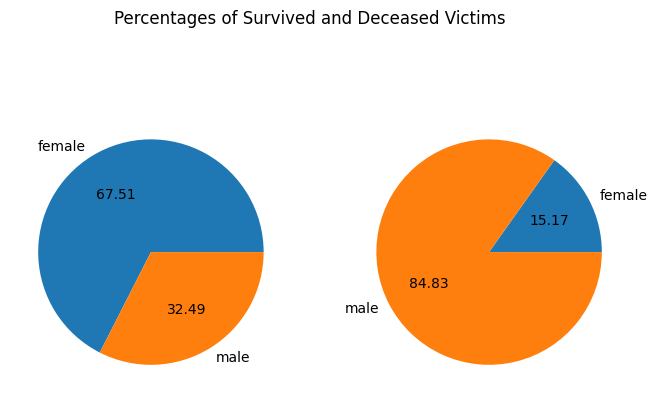

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(survived_victims, labels=survived_victims.index, autopct="%.2f")
ax2.pie(deceased_victims, labels=deceased_victims.index, autopct="%.2f")

fig.suptitle("Percentages of Survived and Deceased Victims")
plt.show()

## Relation between Age and Survived